In [1]:
# http://arohatgi.info/WebPlotDigitizer/app/
# http://arxiv.org/abs/1107.4367

In [16]:
%pylab inline

rc('text', usetex=True, fontsize=28)

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = loadtxt('Westphal-BX154_kulas_data.csv', delimiter=',')

x = data[:,0]/(1+2.5954) #redshift z = 2.5954
y = data[:,1]

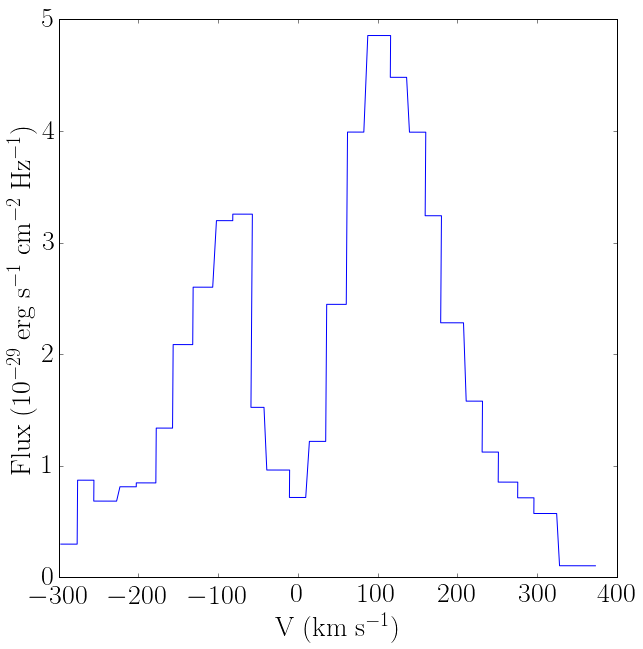

In [4]:
f = figure(figsize = (10,10))
plot(x,y)
xlabel('$\mathrm{V\;(km\;s^{-1})}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
savefig('observation_v.png')

In [5]:
v_th = -12.8
x_x = flipud(x/v_th)
y_x = flipud(y)

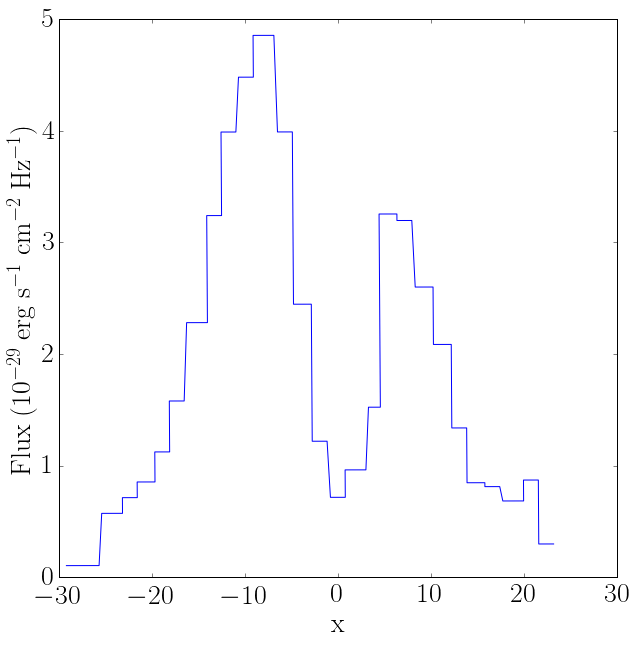

In [6]:
f = figure(figsize = (10,10))
plot(x_x,y_x)
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
savefig('observation_x.png')

In [7]:
def find_bifurcation_index(intensities):
    i_prev = 0
    for i in range(len(intensities)-1):
        i_curr = intensities[i]
        i_next = intensities[i+1]
        if(i_prev >= i_curr and i_curr<=i_next and i_prev-i_curr>(1e-04)*i_curr and i_next-i_curr>(1e-04)*i_curr):
            return i
        i_prev = i_curr

In [8]:
bifurcation_index = find_bifurcation_index(y_x)

print bifurcation_index

bifurcation = x_x[bifurcation_index]

print bifurcation

x_x_neg = x_x[0:bifurcation_index+1]
y_x_neg = y[0:bifurcation_index+1]
x_x_pos = x_x[bifurcation_index:-1]
y_x_pos = y[bifurcation_index:-1]

24
-4.74969756288


(0, 5.0976554689599576)

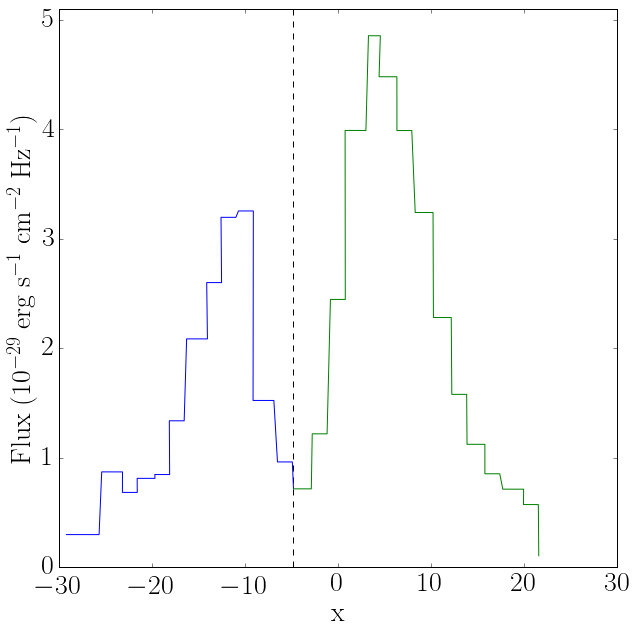

In [9]:
f = figure(figsize = (10,10))
plot(x_x_neg,y_x_neg)
plot(x_x_pos,y_x_pos)
vlines(bifurcation, 0, max(y)*1.5, linestyle='--')
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
ylim(0, max(y)*1.05)

In [10]:
from lmfit.models import SkewedGaussianModel

In [11]:
model_neg = SkewedGaussianModel()
params_neg = model_neg.make_params(amplitude=max(x_x_neg), center = mean(x_x_neg), sigma=std(x_x_neg), gamma = 2)
result_neg = model_neg.fit(y_x_neg, params_neg, x=x_x_neg)

print(result_neg.fit_report())

model_pos = SkewedGaussianModel()
params_pos = model_pos.make_params(amplitude=max(x_x_pos), center = mean(x_x_pos), sigma=std(x_x_pos), gamma = 2)
result_pos = model_pos.fit(y_x_pos, params_pos, x=x_x_pos)

print(result_pos.fit_report())

[[Model]]
    Model(skewed_gaussian)
[[Fit Statistics]]
    # function evals   = 170
    # data points      = 25
    # variables        = 4
    chi-square         = 3.749
    reduced chi-square = 0.179
    Akaike info crit   = -35.074
    Bayesian info crit = -30.198
[[Variables]]
    amplitude:   34.7047311 +/- 2.161367 (6.23%) (init=-4.749698)
    sigma:       7.77051384 +/- 0.876373 (11.28%) (init= 6.807406)
    center:     -7.33521294 +/- 0.555624 (7.57%) (init=-15.74482)
    gamma:      -2.87997938 +/- 1.112092 (38.61%) (init= 2)
[[Correlations]] (unreported correlations are <  0.100)
    C(sigma, center)             =  0.796 
    C(sigma, gamma)              = -0.762 
    C(center, gamma)             = -0.687 
    C(amplitude, sigma)          =  0.445 
    C(amplitude, center)         =  0.327 

[[Model]]
    Model(skewed_gaussian)
[[Fit Statistics]]
    # function evals   = 60
    # data points      = 29
    # variables        = 4
    chi-square         = 3.994
    reduced chi-s

(0, 5.0976554689599576)

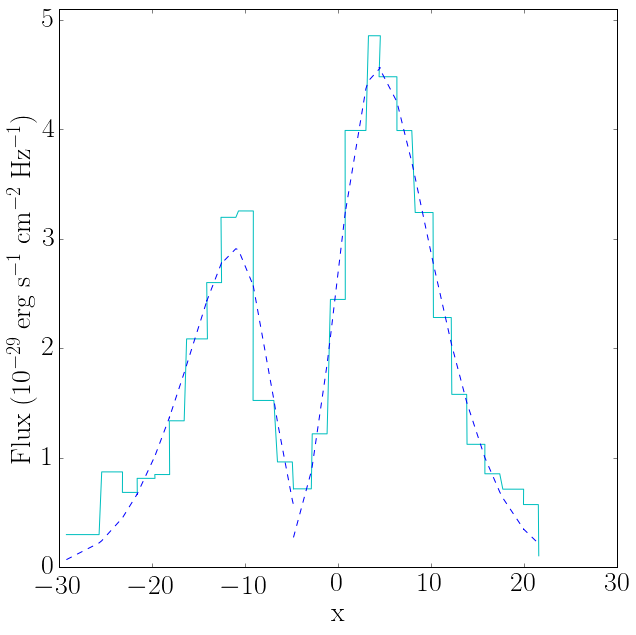

In [12]:
f = figure(figsize = (10,10))
plot(x_x_neg,y_x_neg, c='c')
plot(x_x_neg, result_neg.best_fit, c='b', linestyle='--')
plot(x_x_pos,y_x_pos, c='c')
plot(x_x_pos, result_pos.best_fit, c='b', linestyle='--')
#vlines(bifurcation, 0, max(y)*1.5, linestyle='--')
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
ylim(0, max(y)*1.05)

In [13]:
print result_neg.best_values
print result_pos.best_values

amplitude_neg = result_neg.best_values['amplitude']
sigma_neg = result_neg.best_values['sigma']
center_neg = result_neg.best_values['center']
gamma_neg = result_neg.best_values['gamma']

amplitude_pos = result_pos.best_values['amplitude']
sigma_pos = result_pos.best_values['sigma']
center_pos = result_pos.best_values['center']
gamma_pos = result_pos.best_values['gamma']

{'amplitude': 34.704731161796346, 'sigma': 7.7705138470022845, 'center': -7.3352129473768715, 'gamma': -2.8799793825050561}
{'amplitude': 59.69869323251605, 'sigma': 8.3359828836172927, 'center': 0.26872104025964627, 'gamma': 2.6251283154196745}


In [14]:
gaussian_fit_file = open('gaussian_fit_kulas.dat','w')
gaussian_fit_file.write('amplitude_neg\tsigma_neg\tcenter_neg\tgamma_neg\tamplitude_pos\tsigma_pos\tcenter_pos\tgamma_pos\n')
gaussian_fit_file.write(str(amplitude_neg)+'\t'+str(sigma_neg)+'\t'+str(center_neg)+'\t'+str(gamma_neg)+'\t'+str(amplitude_pos)+'\t'+str(sigma_pos)+'\t'+str(center_pos)+'\t'+str(gamma_pos))
gaussian_fit_file.close()